### Prediction using Decision Tree Algorithm

##### Task 6

#### Author: Fahad Munir

This task is a part of the internship with The Sparks Foundation. In this task we have to analyze the Iris dataset with Decision Tree Algorithm.

In [24]:
#Importing libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Reading the dataset

In [25]:
data = pd.read_csv(r'Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.shape

(150, 6)

In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
features_with_id = data.iloc[:,:-1]
features_with_id_list = list(data.columns)
features_with_id_list.pop(0)
features = features_with_id_list
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [29]:
data = data.drop('Id',1)

In [30]:
X = data.iloc[:,:-1].values
y = data['Species']

### Splitting the dataset into Train and Test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 100)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf=2)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=100)

### Visualizing the Decision Tree

[Text(125.55000000000001, 190.26, 'X[2] <= 2.45\nentropy = 1.58\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(83.7, 135.9, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\nentropy = 0.993\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 5.0\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(41.85, 27.180000000000007, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\nentropy = 0.211\nsamples = 30\nvalue = [0, 1, 29]'),
 Text(209.25, 27.180000000000007, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'entropy = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

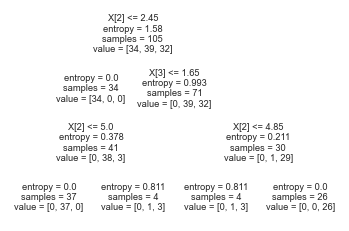

In [37]:
from sklearn import tree
tree.plot_tree(clf_entropy)

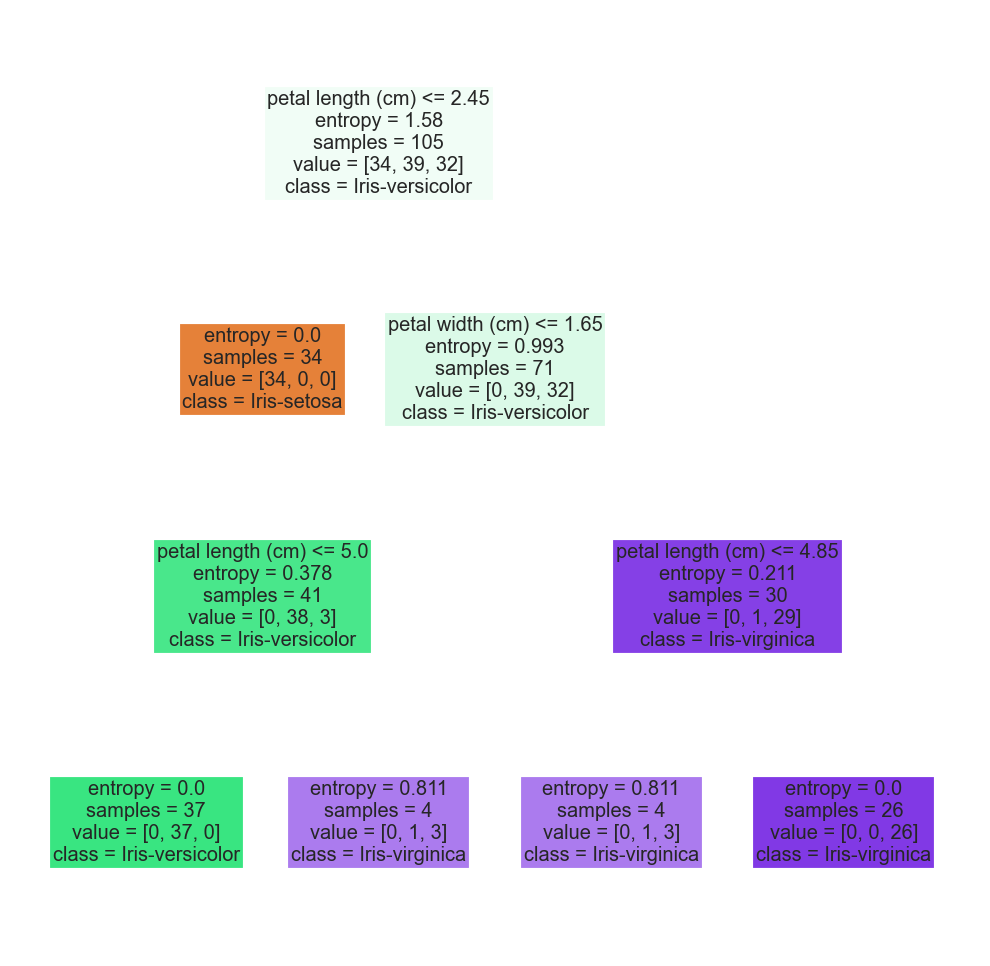

In [38]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [34]:
y_pred = clf_entropy.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



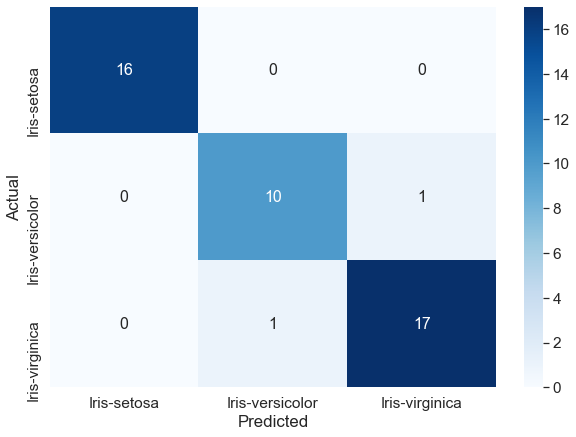

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

#### Precision, recall and f1-score are above 90% that means the model fitted and predicted very well. Accuracy is also around 95% both for weighted average and macro average.